In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Supress Warnings
PATH='~/Downloads/Upgrad/ML-1/Linear Regression Module/Linear Regression Assignment/Data Files/'
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Loading our dataset
carprice=pd.read_csv(PATH+'CarPrice_Assignment.csv')


In [45]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
carprice.shape

(205, 26)

In [47]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
carDictionary=pd.read_excel(PATH+'Data Dictionary - carprices.xlsx')

In [49]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [50]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [52]:
pd.set_option('display.max_rows',250)
carprice['CarName'].str.split(' ')

0      [alfa-romero, giulia]                
1      [alfa-romero, stelvio]               
2      [alfa-romero, Quadrifoglio]          
3      [audi, 100, ls]                      
4      [audi, 100ls]                        
5      [audi, fox]                          
6      [audi, 100ls]                        
7      [audi, 5000]                         
8      [audi, 4000]                         
9      [audi, 5000s, (diesel)]              
10     [bmw, 320i]                          
11     [bmw, 320i]                          
12     [bmw, x1]                            
13     [bmw, x3]                            
14     [bmw, z4]                            
15     [bmw, x4]                            
16     [bmw, x5]                            
17     [bmw, x3]                            
18     [chevrolet, impala]                  
19     [chevrolet, monte, carlo]            
20     [chevrolet, vega, 2300]              
21     [dodge, rampage]                     
22     [do

In [37]:
'volkswagen super beetle'.split(" ",maxsplit=1)

['volkswagen', 'super beetle']

In [38]:
#Creating a new variable company from CarName and doing some spelling corrections
carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ',maxsplit=1)[1])
# carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


IndexError: list index out of range

In [252]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


In [253]:
#Convering Cylindernumber to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

# UNIVARIATE ANALYSIS

In [254]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

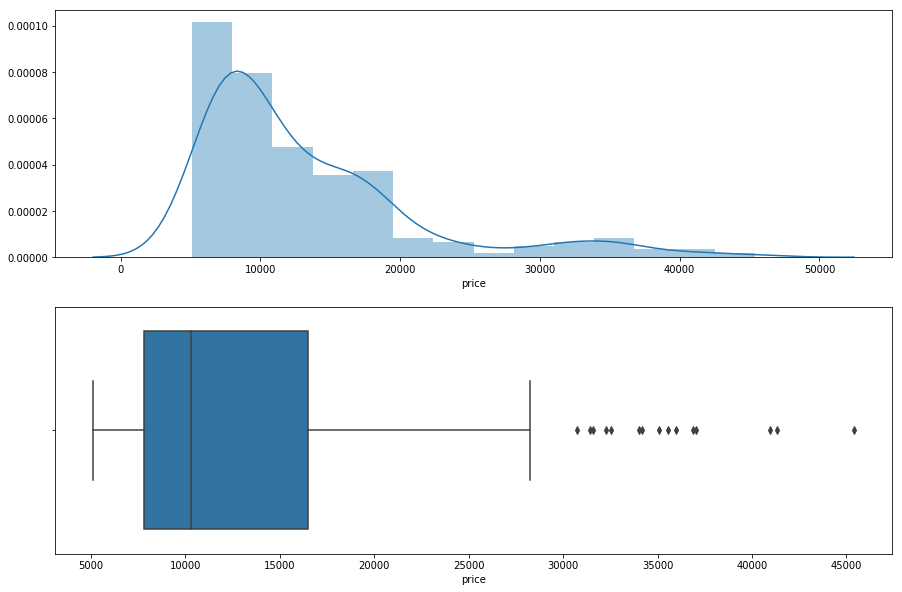

In [255]:
#Plotting the price of the our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price ranges around 5k-45k with Median around 10k

In [256]:
def display_count(ax):
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6),)

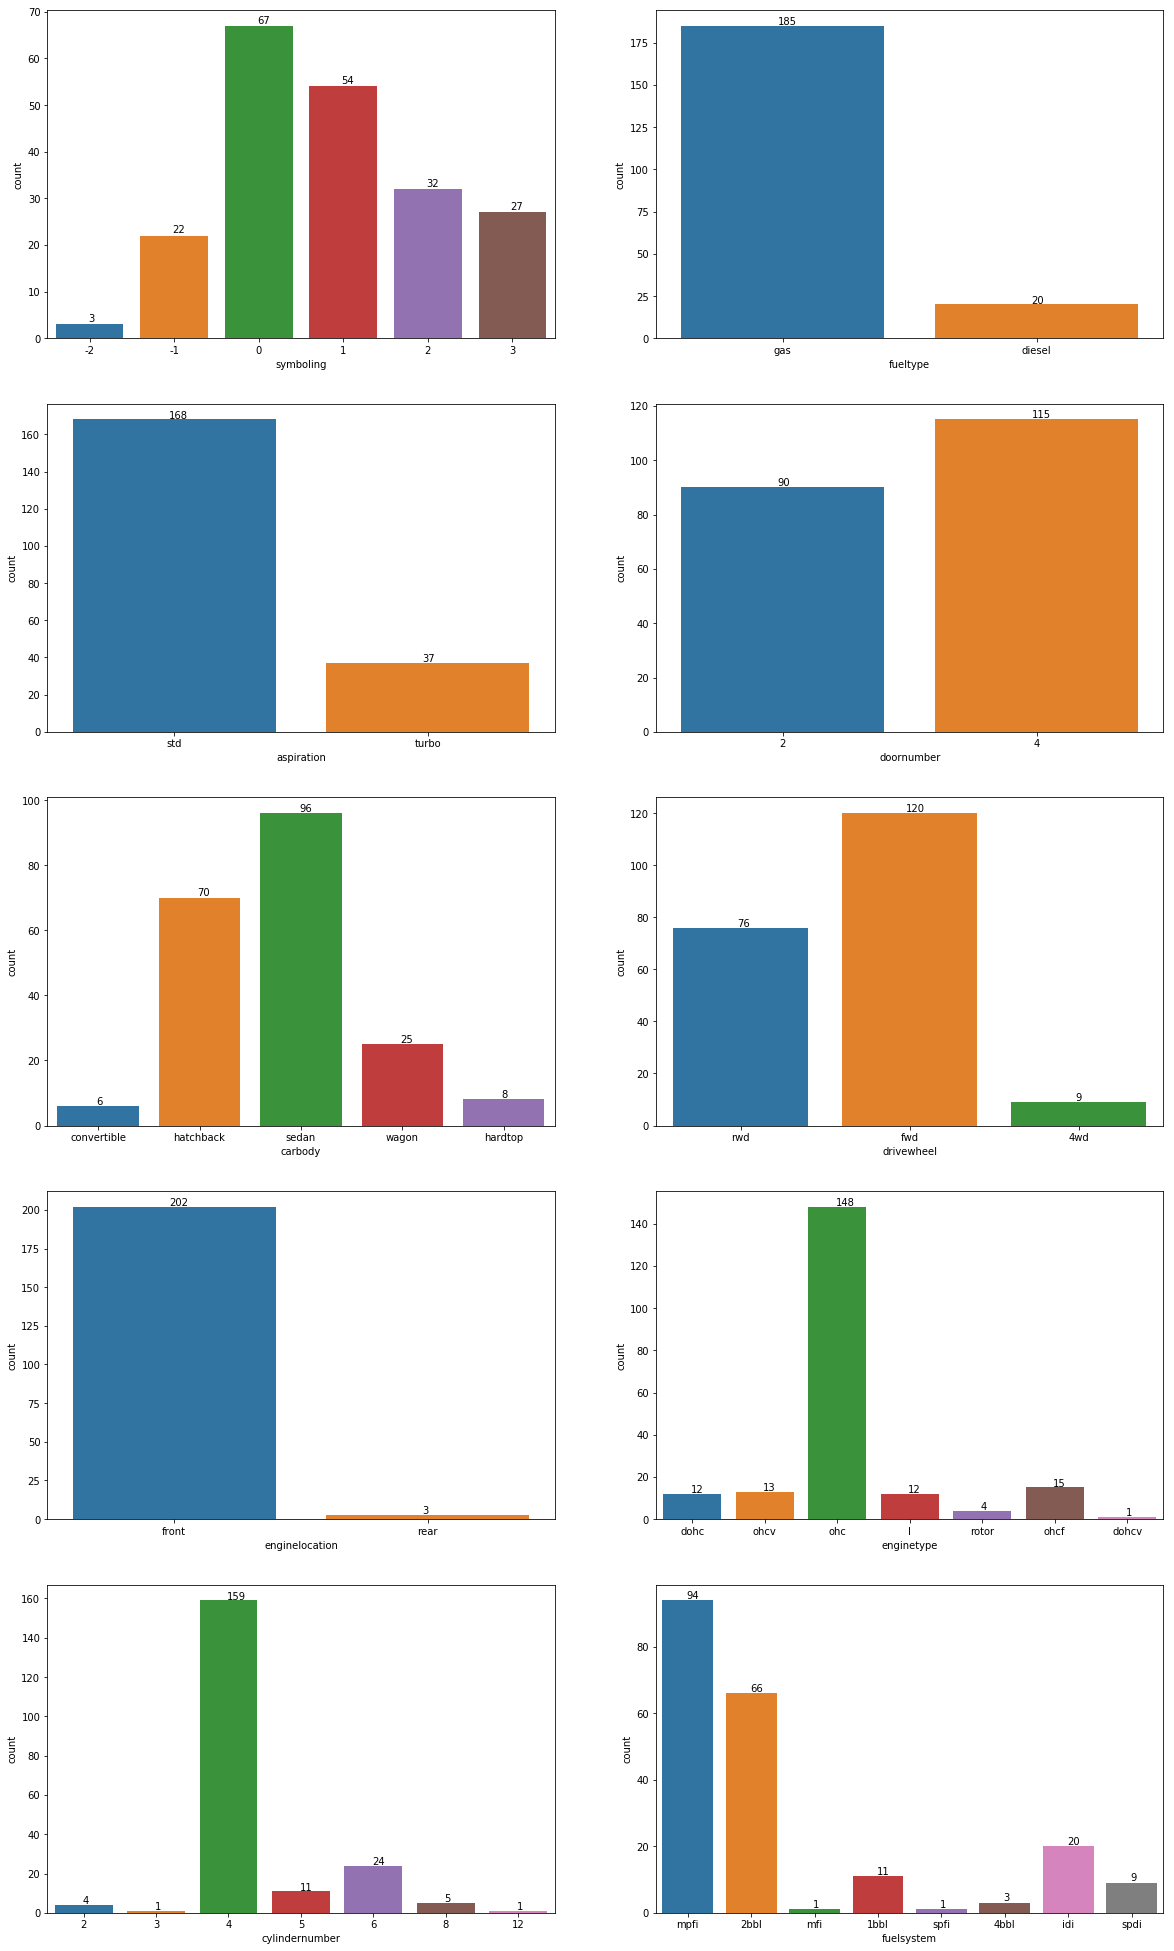

In [257]:
plt.figure(figsize=(20,35))

plt.subplot(5,2,1)
ax=sns.countplot(carprice['symboling'])
display_count(ax)
plt.subplot(5,2,2)
ax=sns.countplot(carprice['fueltype'])
display_count(ax)
plt.subplot(5,2,3)
ax=sns.countplot(carprice['aspiration'])
display_count(ax)
plt.subplot(5,2,4)
ax=sns.countplot(carprice['doornumber'])
display_count(ax)
plt.subplot(5,2,5)
ax=sns.countplot(carprice['carbody'])
display_count(ax)
plt.subplot(5,2,6)
ax=sns.countplot(carprice['drivewheel'])
display_count(ax)
plt.subplot(5,2,7)
ax=sns.countplot(carprice['enginelocation'])
display_count(ax)
plt.subplot(5,2,8)
ax=sns.countplot(carprice['enginetype'])
display_count(ax)
plt.subplot(5,2,9)
ax=sns.countplot(carprice['cylindernumber'])
display_count(ax)
plt.subplot(5,2,10)
ax=sns.countplot(carprice['fuelsystem'])
display_count(ax)

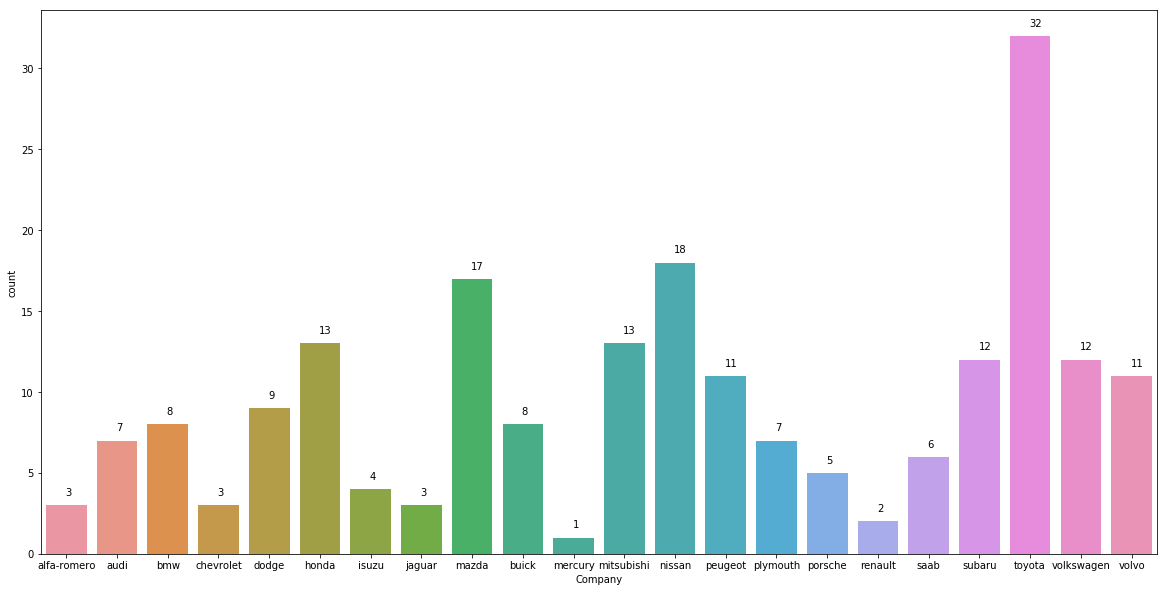

In [258]:
plt.figure(figsize=(20,10))
ax=sns.countplot(carprice['Company'])
display_count(ax)

In [259]:
dum_sign(carprice['fuelsystem'],0.05)

,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,1,0,0


In [260]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [261]:
# plt.figure(figsize=(20,35))

# plt.subplot(5,2,1)
# sns.boxplot(carprice['symboling'],carprice['price'])

# plt.subplot(5,2,2)
# sns.boxplot(carprice['fueltype'],carprice['price'])

# plt.subplot(5,2,3)
# sns.boxplot(carprice['aspiration'],carprice['price'])

# plt.subplot(5,2,4)
# sns.boxplot(carprice['doornumber'],carprice['price'])

# plt.subplot(5,2,5)
# sns.boxplot(carprice['carbody'],carprice['price'])

# plt.subplot(5,2,6)
# sns.boxplot(carprice['drivewheel'],carprice['price'])

# plt.subplot(5,2,7)
# sns.boxplot(carprice['enginelocation'],carprice['price'])

# plt.subplot(5,2,8)
# sns.boxplot(carprice['enginetype'],carprice['price'])

# plt.subplot(5,2,9)
# sns.boxplot(carprice['cylindernumber'],carprice['price'])

# plt.subplot(5,2,10)
# sns.boxplot(carprice['fuelsystem'],carprice['price'])

In [262]:
# plt.figure(figsize=(20,10))
# sns.boxplot(carprice['Company'],carprice['price'])

In [263]:
#Using describe to look at the summary of the Numerical variables
carprice.describe()



,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [264]:
#Plotting a pairplot to see the relation between variables
#sns.pairplot(carprice)

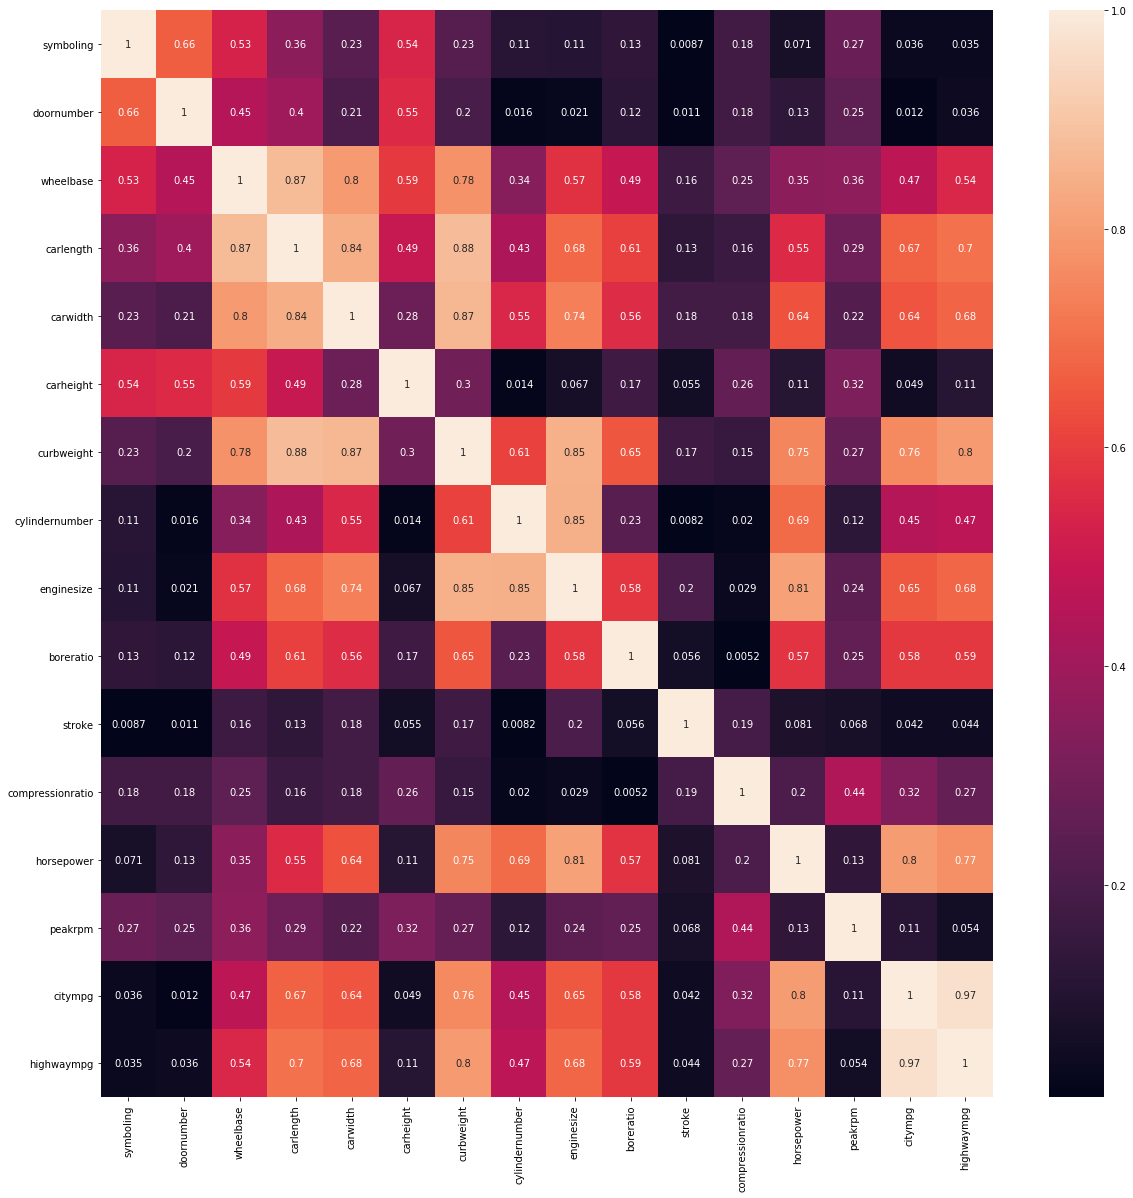

In [265]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True)
#Min Max Scaling of numerical columns in X_train


In [266]:
#Dropping variable with corelation more than 0.8
correlation_matrix = carprice.drop('price', axis=1).corr()
i=0
while i<len(correlation_matrix.columns):
    for j in range(i):
        correlation_matrix = carprice.drop('price', axis=1).corr()
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            print("Dropped Column: "+colname+" as its corelation with "+ correlation_matrix.columns[j]+" was {:.3f}".format(correlation_matrix.iloc[i, j]))
            carprice.drop(colname,axis=1,inplace=True)
    i=i+1

# 

Dropped Column: carlength as its corelation with wheelbase was 0.875
Dropped Column: curbweight as its corelation with carwidth was 0.867
Dropped Column: enginesize as its corelation with cylindernumber was 0.846
Dropped Column: citympg as its corelation with horsepower was -0.801


In [267]:
# Symboling- Min Max Encoding
# Fueltype - Map gas with 1 and diesel with 0
# Aspiratino - Map Std as 1 and turbo as 0
# Door Number - Label Encoding
# Carbody - pd.dummies
# Drivewheel= pd.dummies(columns-rwd and fwd)
# Enginelocatin - Drop
# Enginetype- pd.dummies(drop dohcv)
# Cylinder number - Label Encoding
# Fuel System - pd.dummies(drop mfi)#     i=i+1

#Creating dummy variables for categories with 2 unique values
varlist=['fueltype','aspiration','carbody','drivewheel',
        'fuelsystem','enginetype','Company']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_')


In [268]:
carprice.drop(columns=['fueltype_diesel','aspiration_turbo','carbody_convertible','drivewheel_4wd','enginelocation'
                         ,'enginetype_dohcv','fuelsystem_mfi'],axis=1,inplace=True)

In [269]:
carprice.head()

,symboling,doornumber,wheelbase,carwidth,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,2,88.6,64.1,48.8,4,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,64.1,48.8,4,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,65.5,52.4,6,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,66.2,54.3,4,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,66.4,54.3,5,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [271]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 56)
(62, 56)


In [272]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm',
         'highwaympg','symboling','doornumber','cylindernumber','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


In [273]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [274]:
carprice.doornumber.unique()

array([2, 4])

In [275]:
# #Min Max Scaling of numerical columns in X_train

# from sklearn.preprocessing import LabelEncoder
# le_scaler=LabelEncoder()

# le_scaler_list=['symboling','doornumber','cylindernumber']

# X_train[le_scaler_list]=X_train[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))


In [276]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
#Feature selection using RFE

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [320]:
# rfe.support_

In [321]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [322]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_l,enginetype_ohcf,Company_bmw,Company_buick,Company_jaguar,Company_peugeot,Company_porsche,Company_subaru
122,0.244828,0.291667,0.083333,0,0,1,0,0,0,0,0,0,0,0,0
125,0.272414,0.666667,0.395833,0,1,0,0,0,0,0,0,0,0,1,0
166,0.272414,0.308333,0.266667,0,1,0,0,0,0,0,0,0,0,0,0
1,0.068966,0.316667,0.262500,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.575000,0.475000,0,0,0,1,0,0,0,0,0,0,0,0


In [323]:
#Creating our first model with 20 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.12e-67
Time:                        22:00:20   Log-Likelihood:                 211.64
No. Observations:                 143   AIC:                            -391.3
Df Residuals:                     127   BIC:                            -343.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0167      0.034      0.489      0.625      -0.051       0.084
wheelbase             0.1681      0.061      2.769      0.006       0.048       0.288
carwidth              0.3808      0.074      5.175      0.000       0.235       0.526
horsepower            0.4036      0.055      7.352      0.000       0.295       0.512
carbody_hardtop      -0.1627      0.053     -3.055      0.003      -0.268      -0.057
carbody_hatchback    -0.1721      0.033     -5.150      0.000      -0.238      -0.106
carbody_sedan        -0.1580      0.035     -4.555      0.000      -0.227      -0.089
carbody_wagon        -0.1653      0.037     -4.425      0.000      -0.239      -0.091
enginetype_l          0.1459      0.061      2.385      0.019       0.025       0.267
enginetype_ohcf       0.4156      0.086      4.839      0.000       0.246       0.585
Company_bmw           0.2910      0.028     10.541      0.000       0.236       0.346
Company_buick         0.2072      0.034      6.056      0.000       0.139       0.275
Company_jaguar        0.2550      0.040      6.325      0.000       0.175       0.335
Company_peugeot      -0.1975      0.069     -2.859      0.005      -0.334      -0.061
Company_porsche       0.0958      0.049      1.951      0.053      -0.001       0.193
Company_subaru       -0.4463      0.088     -5.063      0.000      -0.621      -0.272
==============================================================================
Omnibus:                       42.218   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.322
Skew:                           1.053   Prob(JB):                     4.58e-32
Kurtosis:                       7.448   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.77
9,enginetype_ohcf,23.73
15,Company_subaru,23.09
6,carbody_sedan,12.57
13,Company_peugeot,10.55
5,carbody_hatchback,10.53
8,enginetype_l,9.23
2,carwidth,7.66
7,carbody_wagon,6.73
1,wheelbase,6.47


In [325]:
#Creating our second model after dropping carbody_sedan as it has high P value

X_train_rfe.drop('enginetype_ohcf', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.52e-64
Time:                        22:01:08   Log-Likelihood:                 199.54
No. Observations:                 143   AIC:                            -369.1
Df Residuals:                     128   BIC:                            -324.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0296      0.037      0.801      0.424      -0.043       0.103
wheelbase             0.1818      0.066      2.767      0.006       0.052       0.312
carwidth              0.3058      0.078      3.922      0.000       0.152       0.460
horsepower            0.4494      0.059      7.666      0.000       0.333       0.565
carbody_hardtop      -0.0652      0.053     -1.219      0.225      -0.171       0.041
carbody_hatchback    -0.1731      0.036     -4.779      0.000      -0.245      -0.101
carbody_sedan        -0.1518      0.038     -4.038      0.000      -0.226      -0.077
carbody_wagon        -0.1619      0.040     -3.999      0.000      -0.242      -0.082
enginetype_l          0.1332      0.066      2.011      0.046       0.002       0.264
Company_bmw           0.2866      0.030      9.581      0.000       0.227       0.346
Company_buick         0.2284      0.037      6.212      0.000       0.156       0.301
Company_jaguar        0.2553      0.044      5.843      0.000       0.169       0.342
Company_peugeot      -0.1738      0.075     -2.326      0.022      -0.322      -0.026
Company_porsche       0.2061      0.047      4.368      0.000       0.113       0.299
Company_subaru       -0.0300      0.021     -1.442      0.152      -0.071       0.011
==============================================================================
Omnibus:                       34.497   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.251
Skew:                           0.889   Prob(JB):                     6.26e-23
Kurtosis:                       6.742   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.48
6,carbody_sedan,12.55
5,carbody_hatchback,10.53
12,Company_peugeot,10.50
8,enginetype_l,9.22
2,carwidth,7.32
7,carbody_wagon,6.73
1,wheelbase,6.46
3,horsepower,3.33
4,carbody_hardtop,2.09


All the variables have less than 0.05 P value, so lets remove the factor with highest VIF- Company_subaru

In [327]:
#Creating our third model after dropping carbody_hatchback as it has high P value

X_train_rfe.drop('carbody_hardtop', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     116.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.61e-64
Time:                        22:02:06   Log-Likelihood:                 198.71
No. Observations:                 143   AIC:                            -369.4
Df Residuals:                     129   BIC:                            -327.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.028      0.015      0.988      -0.055       0.056
wheelbase             0.1569      0.063      2.507      0.013       0.033       0.281
carwidth              0.3284      0.076      4.327      0.000       0.178       0.479
horsepower            0.4466      0.059      7.610      0.000       0.330       0.563
carbody_hatchback    -0.1441      0.027     -5.268      0.000      -0.198      -0.090
carbody_sedan        -0.1223      0.029     -4.239      0.000      -0.179      -0.065
carbody_wagon        -0.1315      0.032     -4.118      0.000      -0.195      -0.068
enginetype_l          0.1349      0.066      2.033      0.044       0.004       0.266
Company_bmw           0.2899      0.030      9.710      0.000       0.231       0.349
Company_buick         0.2347      0.036      6.432      0.000       0.162       0.307
Company_jaguar        0.2583      0.044      5.909      0.000       0.172       0.345
Company_peugeot      -0.1703      0.075     -2.277      0.024      -0.318      -0.022
Company_porsche       0.1871      0.045      4.194      0.000       0.099       0.275
Company_subaru       -0.0306      0.021     -1.469      0.144      -0.072       0.011
==============================================================================
Omnibus:                       30.143   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.850
Skew:                           0.768   Prob(JB):                     8.39e-20
Kurtosis:                       6.519   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.11
11,Company_peugeot,10.48
7,enginetype_l,9.21
5,carbody_sedan,7.37
2,carwidth,6.91
4,carbody_hatchback,5.98
1,wheelbase,5.83
6,carbody_wagon,4.17
3,horsepower,3.32
9,Company_buick,1.59


After dropping Company_subaru, VIF has decreased significantly for some variables. P value has increased now for enginetype_ohcf, lets drop this variable now to build our fourth model

In [329]:
#Creating our fourth model after dropping enginelocation_rear as it has high VIF

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.07e-65
Time:                        22:02:36   Log-Likelihood:                 197.53
No. Observations:                 143   AIC:                            -369.1
Df Residuals:                     130   BIC:                            -330.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0008      0.028     -0.027      0.978      -0.057       0.055
wheelbase             0.1668      0.062      2.669      0.009       0.043       0.290
carwidth              0.3224      0.076      4.235      0.000       0.172       0.473
horsepower            0.4502      0.059      7.644      0.000       0.334       0.567
carbody_hatchback    -0.1457      0.027     -5.305      0.000      -0.200      -0.091
carbody_sedan        -0.1263      0.029     -4.376      0.000      -0.183      -0.069
carbody_wagon        -0.1399      0.032     -4.436      0.000      -0.202      -0.078
enginetype_l          0.1370      0.067      2.056      0.042       0.005       0.269
Company_bmw           0.2911      0.030      9.713      0.000       0.232       0.350
Company_buick         0.2361      0.037      6.444      0.000       0.164       0.309
Company_jaguar        0.2582      0.044      5.880      0.000       0.171       0.345
Company_peugeot      -0.1705      0.075     -2.269      0.025      -0.319      -0.022
Company_porsche       0.1884      0.045      4.205      0.000       0.100       0.277
==============================================================================
Omnibus:                       29.410   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.117
Skew:                           0.769   Prob(JB):                     2.43e-18
Kurtosis:                       6.354   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.09
11,Company_peugeot,10.48
7,enginetype_l,9.21
5,carbody_sedan,7.31
2,carwidth,6.89
4,carbody_hatchback,5.97
1,wheelbase,5.76
6,carbody_wagon,4.03
3,horsepower,3.32
9,Company_buick,1.59


P-value is now lower than 0.05 for all variables. On checking VIF, we can identify that carbody has a high VIF(11.57), lets drop this variable and validate if on dropping the variable, our R square adjusted drops or not.

In [331]:
#Creating our fifth model after dropping enginetype_ohcf as it has high VIF

X_train_rfe.drop('Company_peugeot', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.25e-65
Time:                        22:02:53   Log-Likelihood:                 194.75
No. Observations:                 143   AIC:                            -365.5
Df Residuals:                     131   BIC:                            -329.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.028      0.271      0.787      -0.049       0.064
wheelbase             0.1468      0.063      2.337      0.021       0.023       0.271
carwidth              0.2941      0.076      3.856      0.000       0.143       0.445
horsepower            0.4657      0.059      7.839      0.000       0.348       0.583
carbody_hatchback    -0.1372      0.028     -4.965      0.000      -0.192      -0.083
carbody_sedan        -0.1187      0.029     -4.077      0.000      -0.176      -0.061
carbody_wagon        -0.1345      0.032     -4.209      0.000      -0.198      -0.071
enginetype_l         -0.0015      0.027     -0.056      0.956      -0.055       0.052
Company_bmw           0.2958      0.030      9.741      0.000       0.236       0.356
Company_buick         0.2570      0.036      7.138      0.000       0.186       0.328
Company_jaguar        0.2703      0.044      6.106      0.000       0.183       0.358
Company_porsche       0.1882      0.046      4.135      0.000       0.098       0.278
==============================================================================
Omnibus:                       30.728   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.164
Skew:                           0.845   Prob(JB):                     1.75e-17
Kurtosis:                       6.177   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.60
5,carbody_sedan,7.21
2,carwidth,6.70
4,carbody_hatchback,5.86
1,wheelbase,5.65
6,carbody_wagon,4.01
3,horsepower,3.27
9,Company_buick,1.49
7,enginetype_l,1.48
11,Company_porsche,1.45


Dropping carbody_sedan has given us mixed result, at one side it has decreased VIF of variable and on the other, P-value of few variables has increases. Lets drop the variable 'carbody_hardtop' and validate if it can help us reduce p value and VIF of variables.

In [333]:
#Creating our sixth model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginetype_l', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.44e-66
Time:                        22:03:08   Log-Likelihood:                 194.75
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     132   BIC:                            -334.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.028      0.272      0.786      -0.048       0.064
wheelbase             0.1453      0.056      2.582      0.011       0.034       0.257
carwidth              0.2945      0.076      3.894      0.000       0.145       0.444
horsepower            0.4661      0.059      7.930      0.000       0.350       0.582
carbody_hatchback    -0.1370      0.027     -5.012      0.000      -0.191      -0.083
carbody_sedan        -0.1185      0.029     -4.135      0.000      -0.175      -0.062
carbody_wagon        -0.1343      0.032     -4.248      0.000      -0.197      -0.072
Company_bmw           0.2961      0.030      9.898      0.000       0.237       0.355
Company_buick         0.2575      0.035      7.412      0.000       0.189       0.326
Company_jaguar        0.2706      0.044      6.199      0.000       0.184       0.357
Company_porsche       0.1879      0.045      4.171      0.000       0.099       0.277
==============================================================================
Omnibus:                       30.744   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.289
Skew:                           0.845   Prob(JB):                     1.65e-17
Kurtosis:                       6.180   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.60
5,carbody_sedan,7.03
2,carwidth,6.64
4,carbody_hatchback,5.78
1,wheelbase,4.56
6,carbody_wagon,3.95
3,horsepower,3.23
10,Company_porsche,1.43
8,Company_buick,1.40
9,Company_jaguar,1.34


On dropping 'carbody_hardtop', our adjusted R square has just dropped by 0.001, lets drop 'carbody_wagon' since it has a high P value.

In [349]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.27e-64
Time:                        22:24:57   Log-Likelihood:                 186.04
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     133   BIC:                            -322.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0813      0.020     -4.163      0.000      -0.120      -0.043
wheelbase             0.0969      0.058      1.664      0.099      -0.018       0.212
carwidth              0.2801      0.080      3.502      0.001       0.122       0.438
horsepower            0.5083      0.061      8.293      0.000       0.387       0.630
carbody_hatchback    -0.0373      0.014     -2.736      0.007      -0.064      -0.010
carbody_wagon        -0.0246      0.018     -1.352      0.179      -0.061       0.011
Company_bmw           0.2865      0.032      9.075      0.000       0.224       0.349
Company_buick         0.2891      0.036      8.056      0.000       0.218       0.360
Company_jaguar        0.2631      0.046      5.697      0.000       0.172       0.354
Company_porsche       0.2039      0.048      4.291      0.000       0.110       0.298
==============================================================================
Omnibus:                       32.070   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.195
Skew:                           0.956   Prob(JB):                     1.55e-15
Kurtosis:                       5.791   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.66
6,carbody_sedan,12.27
13,Company_peugeot,10.55
5,carbody_hatchback,10.26
9,enginetype_l,9.20
2,carwidth,7.11
7,carbody_wagon,6.53
1,wheelbase,5.75
3,horsepower,3.32
4,carbody_hardtop,1.87


"Horsepower" has a high VIF, lets drop the variable and check P values and VIF of the remaining variables.

In [294]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('wheelbase', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.31e-63
Time:                        21:48:37   Log-Likelihood:                 195.04
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     129   BIC:                            -320.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0036      0.036     -0.099      0.921      -0.075       0.068
carwidth              0.4061      0.059      6.912      0.000       0.290       0.522
horsepower            0.5502      0.058      9.515      0.000       0.436       0.665
carbody_hardtop       0.0129      0.051      0.254      0.800      -0.087       0.113
carbody_hatchback    -0.1406      0.035     -3.988      0.000      -0.210      -0.071
carbody_sedan        -0.1173      0.036     -3.298      0.001      -0.188      -0.047
carbody_wagon        -0.1150      0.037     -3.069      0.003      -0.189      -0.041
fuelsystem_idi        0.0809      0.023      3.466      0.001       0.035       0.127
enginetype_l          0.1450      0.068      2.133      0.035       0.011       0.280
Company_bmw           0.2997      0.029     10.282      0.000       0.242       0.357
Company_buick         0.2015      0.038      5.250      0.000       0.126       0.277
Company_jaguar        0.2503      0.043      5.868      0.000       0.166       0.335
Company_peugeot      -0.1736      0.076     -2.280      0.024      -0.324      -0.023
Company_subaru       -0.0301      0.021     -1.415      0.160      -0.072       0.012
==============================================================================
Omnibus:                       37.024   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.961
Skew:                           0.992   Prob(JB):                     7.24e-23
Kurtosis:                       6.630   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.14
5,carbody_sedan,10.64
12,Company_peugeot,10.33
4,carbody_hatchback,9.43
8,enginetype_l,9.19
6,carbody_wagon,5.45
1,carwidth,3.93
2,horsepower,3.07
3,carbody_hardtop,1.78
10,Company_buick,1.68


In [296]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.04e-63
Time:                        21:48:51   Log-Likelihood:                 193.94
No. Observations:                 143   AIC:                            -361.9
Df Residuals:                     130   BIC:                            -323.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0052      0.036     -0.143      0.887      -0.077       0.067
carwidth              0.4069      0.059      6.899      0.000       0.290       0.524
horsepower            0.5534      0.058      9.543      0.000       0.439       0.668
carbody_hardtop       0.0130      0.051      0.256      0.798      -0.088       0.114
carbody_hatchback    -0.1413      0.035     -3.995      0.000      -0.211      -0.071
carbody_sedan        -0.1200      0.036     -3.367      0.001      -0.191      -0.050
carbody_wagon        -0.1216      0.037     -3.259      0.001      -0.195      -0.048
fuelsystem_idi        0.0833      0.023      3.565      0.001       0.037       0.130
enginetype_l          0.1474      0.068      2.160      0.033       0.012       0.282
Company_bmw           0.3024      0.029     10.356      0.000       0.245       0.360
Company_buick         0.2027      0.039      5.264      0.000       0.127       0.279
Company_jaguar        0.2518      0.043      5.884      0.000       0.167       0.336
Company_peugeot      -0.1726      0.076     -2.258      0.026      -0.324      -0.021
==============================================================================
Omnibus:                       36.172   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.588
Skew:                           0.993   Prob(JB):                     4.76e-21
Kurtosis:                       6.429   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     129.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.19e-65
Time:                        21:34:23   Log-Likelihood:                -1307.1
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     131   BIC:                             2674.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5135.6158   1038.818      4.944      0.000    3080.586    7190.646
carwidth            1.47e+04   2124.161      6.919      0.000    1.05e+04    1.89e+04
horsepower         2.009e+04   2081.820      9.648      0.000     1.6e+04    2.42e+04
carbody_hatchback -5320.3770    995.523     -5.344      0.000   -7289.759   -3350.995
carbody_sedan     -4546.6400   1019.670     -4.459      0.000   -6563.791   -2529.489
carbody_wagon     -4601.4759   1096.837     -4.195      0.000   -6771.281   -2431.671
fuelsystem_idi     3033.8616    839.713      3.613      0.000    1372.708    4695.015
enginetype_l       5335.7611   2460.839      2.168      0.032     467.635    1.02e+04
Company_bmw        1.094e+04   1052.718     10.390      0.000    8855.493     1.3e+04
Company_buick      7289.3244   1376.073      5.297      0.000    4567.124       1e+04
Company_jaguar     9100.5376   1542.443      5.900      0.000    6049.218    1.22e+04
Company_peugeot   -6254.9999   2757.163     -2.269      0.025   -1.17e+04    -800.673
==============================================================================
Omnibus:                       38.625   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.801
Skew:                           1.053   Prob(JB):                     4.75e-23
Kurtosis:                       6.580   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.10
5,carbody_sedan,10.60
12,Company_peugeot,10.32
4,carbody_hatchback,9.43
8,enginetype_l,9.18
6,carbody_wagon,5.37
1,carwidth,3.93
2,horsepower,3.06
3,carbody_hardtop,1.78
10,Company_buick,1.67


In [298]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.05e-62
Time:                        21:49:03   Log-Likelihood:                 187.96
No. Observations:                 143   AIC:                            -351.9
Df Residuals:                     131   BIC:                            -316.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1061      0.021     -4.988      0.000      -0.148      -0.064
carwidth              0.3646      0.060      6.091      0.000       0.246       0.483
horsepower            0.5895      0.059      9.956      0.000       0.472       0.707
carbody_hardtop       0.1174      0.042      2.802      0.006       0.035       0.200
carbody_hatchback    -0.0308      0.014     -2.246      0.026      -0.058      -0.004
carbody_wagon        -0.0104      0.018     -0.576      0.566      -0.046       0.025
fuelsystem_idi        0.0760      0.024      3.146      0.002       0.028       0.124
enginetype_l          0.1379      0.071      1.947      0.054      -0.002       0.278
Company_bmw           0.2923      0.030      9.688      0.000       0.233       0.352
Company_buick         0.2379      0.039      6.180      0.000       0.162       0.314
Company_jaguar        0.2432      0.044      5.480      0.000       0.155       0.331
Company_peugeot      -0.1548      0.079     -1.954      0.053      -0.311       0.002
==============================================================================
Omnibus:                       28.628   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.474
Skew:                           0.884   Prob(JB):                     5.45e-13
Kurtosis:                       5.521   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.03
11,Company_peugeot,10.28
7,enginetype_l,9.17
1,carwidth,3.76
2,horsepower,2.96
9,Company_buick,1.55
6,fuelsystem_idi,1.50
4,carbody_hatchback,1.32
10,Company_jaguar,1.25
5,carbody_wagon,1.16


In [300]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carbody_wagon', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.8
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.06e-63
Time:                        21:49:17   Log-Likelihood:                 187.78
No. Observations:                 143   AIC:                            -353.6
Df Residuals:                     132   BIC:                            -321.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1092      0.021     -5.315      0.000      -0.150      -0.069
carwidth              0.3667      0.060      6.154      0.000       0.249       0.485
horsepower            0.5885      0.059      9.968      0.000       0.472       0.705
carbody_hardtop       0.1200      0.042      2.888      0.005       0.038       0.202
carbody_hatchback    -0.0284      0.013     -2.179      0.031      -0.054      -0.003
fuelsystem_idi        0.0772      0.024      3.217      0.002       0.030       0.125
enginetype_l          0.1385      0.071      1.962      0.052      -0.001       0.278
Company_bmw           0.2946      0.030      9.878      0.000       0.236       0.354
Company_buick         0.2367      0.038      6.173      0.000       0.161       0.313
Company_jaguar        0.2452      0.044      5.557      0.000       0.158       0.332
Company_peugeot      -0.1581      0.079     -2.006      0.047      -0.314      -0.002
==============================================================================
Omnibus:                       29.106   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.303
Skew:                           0.899   Prob(JB):                     3.60e-13
Kurtosis:                       5.526   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.79
1,carwidth,3.15
2,horsepower,2.85
5,fuelsystem_idi,1.39
7,Company_buick,1.36
8,Company_jaguar,1.23
4,carbody_hatchback,1.18
6,Company_bmw,1.11
3,carbody_hardtop,1.10


In [302]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_peugeot', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.20e-63
Time:                        21:49:26   Log-Likelihood:                 185.63
No. Observations:                 143   AIC:                            -351.3
Df Residuals:                     133   BIC:                            -321.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0971      0.020     -4.889      0.000      -0.136      -0.058
carwidth              0.3286      0.057      5.753      0.000       0.216       0.442
horsepower            0.6035      0.059     10.192      0.000       0.486       0.721
carbody_hardtop       0.1171      0.042      2.787      0.006       0.034       0.200
carbody_hatchback    -0.0257      0.013     -1.955      0.053      -0.052       0.000
fuelsystem_idi        0.0741      0.024      3.059      0.003       0.026       0.122
enginetype_l          0.0068      0.026      0.260      0.795      -0.045       0.059
Company_bmw           0.2971      0.030      9.860      0.000       0.238       0.357
Company_buick         0.2546      0.038      6.752      0.000       0.180       0.329
Company_jaguar        0.2538      0.044      5.716      0.000       0.166       0.342
==============================================================================
Omnibus:                       29.110   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.703
Skew:                           0.929   Prob(JB):                     2.18e-12
Kurtosis:                       5.357   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('enginetype_l', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.49e-65
Time:                        21:49:45   Log-Likelihood:                 185.60
No. Observations:                 143   AIC:                            -353.2
Df Residuals:                     134   BIC:                            -326.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0978      0.020     -4.990      0.000      -0.137      -0.059
carwidth              0.3323      0.055      6.025      0.000       0.223       0.441
horsepower            0.6013      0.058     10.298      0.000       0.486       0.717
carbody_hardtop       0.1172      0.042      2.799      0.006       0.034       0.200
carbody_hatchback    -0.0258      0.013     -1.979      0.050      -0.052   -9.57e-06
fuelsystem_idi        0.0756      0.023      3.225      0.002       0.029       0.122
Company_bmw           0.2967      0.030      9.895      0.000       0.237       0.356
Company_buick         0.2520      0.036      6.960      0.000       0.180       0.324
Company_jaguar        0.2530      0.044      5.732      0.000       0.166       0.340
==============================================================================
Omnibus:                       29.113   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.591
Skew:                           0.931   Prob(JB):                     2.31e-12
Kurtosis:                       5.352   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.79
1,carwidth,3.15
2,horsepower,2.85
5,fuelsystem_idi,1.39
7,Company_buick,1.36
8,Company_jaguar,1.23
4,carbody_hatchback,1.18
6,Company_bmw,1.11
3,carbody_hardtop,1.10


In [3370]:
varlist=list(X_train_rfe.columns[1:,])
varlist

['carwidth',
 'horsepower',
 'carbody_hatchback',
 'enginelocation_rear',
 'fuelsystem_idi',
 'enginetype_dohcv',
 'Company_bmw',
 'Company_buick',
 'Company_jaguar',
 'Company_porsche']

In [335]:
y_train_predict=lr6.predict(X_train_rfe)

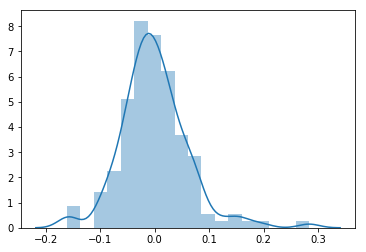

In [336]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

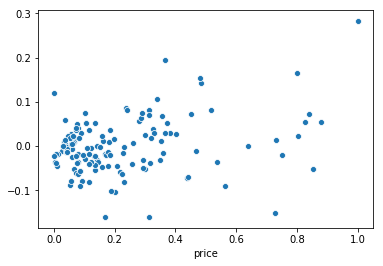

In [337]:
sns.scatterplot(y_train,y_train-y_train_predict)

In [309]:
X_test_rfe.head()

,const,carwidth,horsepower,carbody_hatchback,Company_bmw,Company_buick,Company_jaguar,Company_porsche
160,1.0,0.341667,0.091667,0,0,0,0,0
186,1.0,0.433333,0.154167,0,0,0,0,0
59,1.0,0.516667,0.150000,1,0,0,0,0
165,1.0,0.308333,0.266667,0,0,0,0,0
140,1.0,0.291667,0.104167,1,0,0,0,0


In [310]:
X_test.head()

,symboling,doornumber,wheelbase,carwidth,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
160,0,4,95.7,64.4,53.0,4,3.19,3.03,9.0,70,...,0,0,0,0,0,0,0,1,0,0
186,2,4,97.3,65.5,55.7,4,3.19,3.40,9.0,85,...,0,0,0,0,0,0,0,0,1,0
59,1,2,98.8,66.5,53.7,4,3.39,3.39,8.6,84,...,0,0,0,0,0,0,0,0,0,0
165,1,2,94.5,64.0,52.6,4,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
140,2,2,93.3,63.8,55.7,4,3.62,2.64,8.7,73,...,0,0,0,0,0,0,1,0,0,0


In [338]:
X_test_rfe=X_test.copy()

In [339]:
#Min Max Scaling of numerical columns in X_test

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])
# X_test_rfe[le_scaler_list]=X_test_rfe[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))

In [340]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [341]:
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_predict=lr6.predict(X_test_rfe)

In [342]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe,y_test_predict)

0.8937142901885832

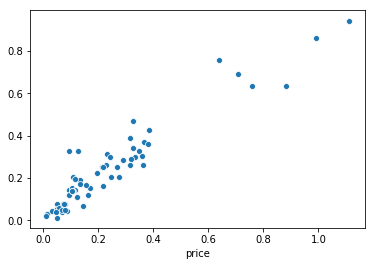

In [343]:
sns.scatterplot(y_test_rfe,y_test_predict)

In [344]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rfe,y_test_predict)

0.0056807835831998955

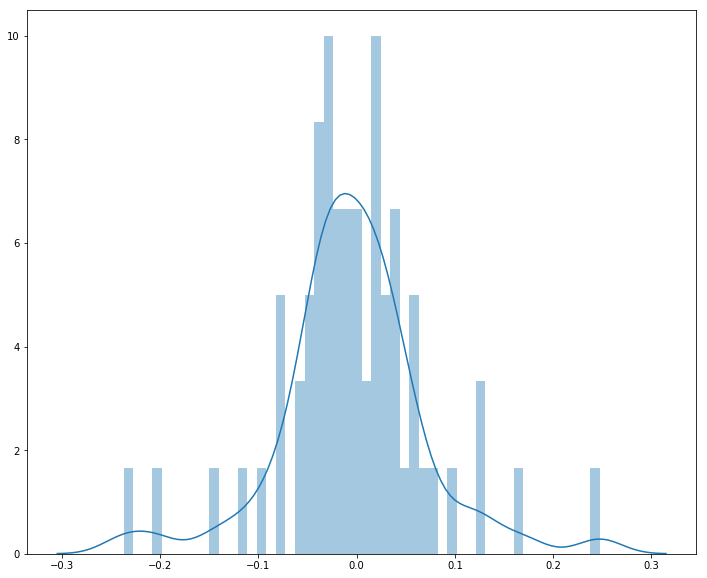

In [345]:
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=50)

Our Linear Regression equation becomes:
    

In [347]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.44e-66
Time:                        22:24:11   Log-Likelihood:                 194.75
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     132   BIC:                            -334.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.028      0.272      0.786      -0.048       0.064
wheelbase             0.1453      0.056      2.582      0.011       0.034       0.257
carwidth              0.2945      0.076      3.894      0.000       0.145       0.444
horsepower            0.4661      0.059      7.930      0.000       0.350       0.582
carbody_hatchback    -0.1370      0.027     -5.012      0.000      -0.191      -0.083
carbody_sedan        -0.1185      0.029     -4.135      0.000      -0.175      -0.062
carbody_wagon        -0.1343      0.032     -4.248      0.000      -0.197      -0.072
Company_bmw           0.2961      0.030      9.898      0.000       0.237       0.355
Company_buick         0.2575      0.035      7.412      0.000       0.189       0.326
Company_jaguar        0.2706      0.044      6.199      0.000       0.184       0.357
Company_porsche       0.1879      0.045      4.171      0.000       0.099       0.277
==============================================================================
Omnibus:                       30.744   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.289
Skew:                           0.845   Prob(JB):                     1.65e-17
Kurtosis:                       6.180   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.60
5,carbody_sedan,7.03
2,carwidth,6.64
4,carbody_hatchback,5.78
1,wheelbase,4.56
6,carbody_wagon,3.95
3,horsepower,3.23
10,Company_porsche,1.43
8,Company_buick,1.40
9,Company_jaguar,1.34
